In [2]:
import random
import numpy as np
np.random.default_rng
import pandas as pd
import os
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load dataframe from sample 
df = pd.read_csv('sample.csv')
df

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,...,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,24.11,11.00,13072.0,23.0,22.0,b'ack',55.0,b'-------',12.0,408.0,...,328.522947,18068.8,55.0,0.008446,0.000000,2.441154,2.471163,1.030019,50.046382,b'Normal'
1,2.00,24.20,183804.0,2.0,21.0,b'tcp',1540.0,b'-------',3.0,5742.0,...,328.264040,505526.0,1540.0,0.236321,0.000000,18.518848,18.549218,1.000000,50.018467,b'Normal'
2,15.00,24.15,555513.0,23.0,24.0,b'tcp',1540.0,b'-------',16.0,15511.0,...,328.205808,505437.0,1540.0,0.236337,0.000000,48.238006,48.268376,1.000000,50.030211,b'Normal'
3,1.20,24.43,25407.0,21.0,23.0,b'cbr',1500.0,b'-------',22.0,976.0,...,1016.542930,1524810.0,1500.0,0.130291,0.035400,24.698286,24.733686,1.000000,9.959779,b'UDP-Flood'
4,3.10,24.23,584008.0,23.0,24.0,b'cbr',1000.0,b'-------',24.0,3391.0,...,124.943226,124943.0,1000.0,0.059605,0.000480,52.128000,52.158720,25.000000,75.022720,b'Normal'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.20,24.54,28012.0,22.0,23.0,b'cbr',1192.0,b'-------',33.0,1019.0,...,962.684973,1147520.0,1192.0,0.098389,0.080400,27.071000,27.151400,1.000000,9.990480,b'UDP-Flood'
996,9.00,24.90,401943.0,9.0,21.0,b'tcp',1540.0,b'-------',10.0,11641.0,...,328.063862,505218.0,1540.0,0.236234,0.000216,36.458983,36.489568,1.000000,50.030088,b'Normal'
997,4.00,24.40,380982.0,4.0,21.0,b'tcp',1540.0,b'-------',5.0,11116.0,...,328.217832,505455.0,1540.0,0.236321,0.000038,34.851202,34.881609,1.000000,50.025368,b'Normal'
998,6.00,24.60,479552.0,21.0,23.0,b'tcp',1540.0,b'-------',7.0,13600.0,...,328.192835,505416.0,1540.0,0.236321,0.000104,42.412395,42.442869,1.000000,50.029102,b'Normal'


In [ ]:
df.info() #to see the data types and null values    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SRC_ADD           1000 non-null   float64
 1   DES_ADD           1000 non-null   float64
 2   PKT_ID            1000 non-null   float64
 3   FROM_NODE         1000 non-null   float64
 4   TO_NODE           1000 non-null   float64
 5   PKT_TYPE          1000 non-null   object 
 6   PKT_SIZE          1000 non-null   float64
 7   FLAGS             1000 non-null   object 
 8   FID               1000 non-null   float64
 9   SEQ_NUMBER        1000 non-null   float64
 10  NUMBER_OF_PKT     1000 non-null   float64
 11  NUMBER_OF_BYTE    1000 non-null   float64
 12  NODE_NAME_FROM    1000 non-null   object 
 13  NODE_NAME_TO      1000 non-null   object 
 14  PKT_IN            1000 non-null   float64
 15  PKT_OUT           1000 non-null   float64
 16  PKT_R             1000 non-null   float64
 

In [13]:
#print all the data types 
df.dtypes

SRC_ADD             float64
DES_ADD             float64
PKT_ID              float64
FROM_NODE           float64
TO_NODE             float64
PKT_TYPE             object
PKT_SIZE            float64
FLAGS                object
FID                 float64
SEQ_NUMBER          float64
NUMBER_OF_PKT       float64
NUMBER_OF_BYTE      float64
NODE_NAME_FROM       object
NODE_NAME_TO         object
PKT_IN              float64
PKT_OUT             float64
PKT_R               float64
PKT_DELAY_NODE      float64
PKT_RATE            float64
BYTE_RATE           float64
PKT_AVG_SIZE        float64
UTILIZATION         float64
PKT_DELAY           float64
PKT_SEND_TIME       float64
PKT_RESEVED_TIME    float64
FIRST_PKT_SENT      float64
LAST_PKT_RESEVED    float64
PKT_CLASS            object
dtype: object

We notice that some features were saved as float when they were improted instead of being saved as int, we will change this below. 

In [ ]:
# changing some float features into int. 
df[]

In [ ]:
#print the columns that are of type object
df.select_dtypes(include=['object']).head(5)


,PKT_TYPE,FLAGS,NODE_NAME_FROM,NODE_NAME_TO,PKT_CLASS
0,b'ack',b'-------',b'Router',b'Switch2',b'Normal'
1,b'tcp',b'-------',b'clien-2',b'Switch1',b'Normal'
2,b'tcp',b'-------',b'Router',b'server1',b'Normal'
3,b'cbr',b'-------',b'switch1',b'router',b'UDP-Flood'
4,b'cbr',b'-------',b'Router',b'server1',b'Normal'


We notice that all the object columns seem to be catgorical and threfore can be encoded. The Flags column seems to not have proper data. 

In [15]:
# for each categorical column, print the unique values and their counts
for col in df.select_dtypes(include=['object']).columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print()

Column: PKT_TYPE
PKT_TYPE
b'tcp'     385
b'ack'     334
b'cbr'     275
b'ping'      6
Name: count, dtype: int64

Column: FLAGS
FLAGS
b'-------'    1000
Name: count, dtype: int64

Column: NODE_NAME_FROM
NODE_NAME_FROM
b'Router'             299
b'Switch1'            165
b'Switch2'            131
b'server1'            105
b'router'              36
b'clien-3'             21
b'switch2'             19
b'switch1'             18
b'clien-8'             16
b'clien-15'            16
b'clien-2'             13
b'clien-4'             13
b'clien-12'            13
b'clien-5'             12
b'clien-13'            11
b'clien-7'             10
b'clien-9'              9
b'clien-14'             9
b'webcache'             9
b'clien-1'              9
b'clien-11'             8
b'clien-10'             6
b'clien-0'              6
b'clien-19'             5
b'clien-18'             5
b'client-14'            4
b'clien-17'             4
b'client-19'            4
b'client-17'            3
b'webserverlistin'      3
b'c

In [ ]:
#we will drop the Flags column as it is not useful for our analysis
df.drop(columns=['Flags'], inplace=True)


In [ ]:
#print the columns that are of type bool
df.select_dtypes(include=['float64']).head(5)


,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_SIZE,FID,SEQ_NUMBER,NUMBER_OF_PKT,NUMBER_OF_BYTE,...,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED
0,24.11,11.00,13072.0,23.0,22.0,55.0,12.0,408.0,16103.0,885665.0,...,0.00000,328.522947,18068.8,55.0,0.008446,0.00000,2.441154,2.471163,1.030019,50.046382
1,2.00,24.20,183804.0,2.0,21.0,1540.0,3.0,5742.0,16091.0,24780100.0,...,0.00000,328.264040,505526.0,1540.0,0.236321,0.00000,18.518848,18.549218,1.000000,50.018467
2,15.00,24.15,555513.0,23.0,24.0,1540.0,16.0,15511.0,16092.0,24781700.0,...,0.00000,328.205808,505437.0,1540.0,0.236337,0.00000,48.238006,48.268376,1.000000,50.030211
3,1.20,24.43,25407.0,21.0,23.0,1500.0,22.0,976.0,9108.0,13662000.0,...,0.00204,1016.542930,1524810.0,1500.0,0.130291,0.03540,24.698286,24.733686,1.000000,9.959779
4,3.10,24.23,584008.0,23.0,24.0,1000.0,24.0,3391.0,6250.0,6250000.0,...,0.00024,124.943226,124943.0,1000.0,0.059605,0.00048,52.128000,52.158720,25.000000,75.022720


We notice that the numbers are on different scales. We need to standardize the data.

<Axes: xlabel='PKT_CLASS'>

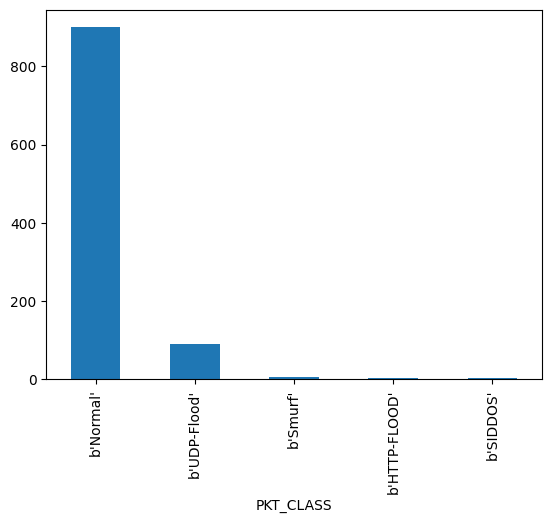

In [7]:
#check for class imbalance
df['PKT_CLASS'].value_counts().plot(kind='bar')

We notice that there is a great imbalance in the class with Normal packets being more than 90% of the classes. We will need to find a solution to that. 